<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/Prophet_in_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd
import numpy as np
import datetime

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)

## Import Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/daily-min-temperatures.csv')

In [4]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


**Converter a coluna Date para Timestamp utilizando a biblioteca datetime**

In [6]:
df['Date'] = df['Date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

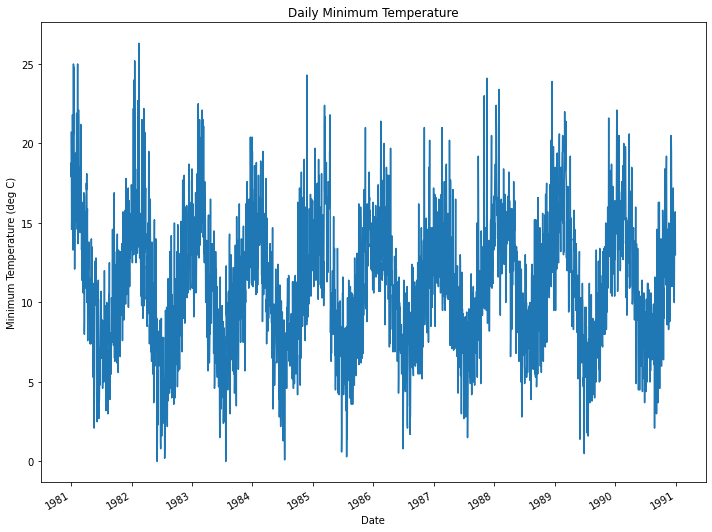

In [7]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()

ax.plot(df.Date, df.Temp)

ax.xaxis.set_major_locator(locator)

ax.set_xlabel('Date')
ax.set_ylabel('Minimum Temperature (deg C)')

ax.set_title('Daily Minimum Temperature')

fig.autofmt_xdate()
plt.tight_layout()

## Quickstart

In [8]:
df.columns = ['ds', 'y']

In [9]:
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [10]:
m = Prophet()

In [11]:
m.fit(df);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/9tk5cpqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/gcu93ul4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41820', 'data', 'file=/tmp/tmpllved68f/9tk5cpqa.json', 'init=/tmp/tmpllved68f/gcu93ul4.json', 'output', 'file=/tmp/tmpnnlp755x/prophet_model-20220818111546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=365)

In [13]:
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


In [14]:
forecast = m.predict(future)

In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4010,1991-12-27,11.593460,10.699726,17.871850,11.514124,11.681552,2.899727,2.899727,2.899727,-0.019842,-0.019842,-0.019842,2.919570,2.919570,2.919570,0.0,0.0,0.0,14.493187
4011,1991-12-28,11.593487,11.198795,18.033915,11.513538,11.681835,2.918118,2.918118,2.918118,-0.060143,-0.060143,-0.060143,2.978261,2.978261,2.978261,0.0,0.0,0.0,14.511606
4012,1991-12-29,11.593515,11.046867,18.163324,11.512952,11.682119,2.889339,2.889339,2.889339,-0.153087,-0.153087,-0.153087,3.042427,3.042427,3.042427,0.0,0.0,0.0,14.482854
4013,1991-12-30,11.593542,11.330521,18.271139,11.512382,11.682402,3.091609,3.091609,3.091609,-0.019706,-0.019706,-0.019706,3.111316,3.111316,3.111316,0.0,0.0,0.0,14.685151
4014,1991-12-31,11.593570,11.105516,18.364888,11.511825,11.682683,3.262518,3.262518,3.262518,0.078494,0.078494,0.078494,3.184025,3.184025,3.184025,0.0,0.0,0.0,14.856088


In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4010,1991-12-27,14.493187,10.699726,17.871850
4011,1991-12-28,14.511606,11.198795,18.033915
4012,1991-12-29,14.482854,11.046867,18.163324
4013,1991-12-30,14.685151,11.330521,18.271139
4014,1991-12-31,14.856088,11.105516,18.364888


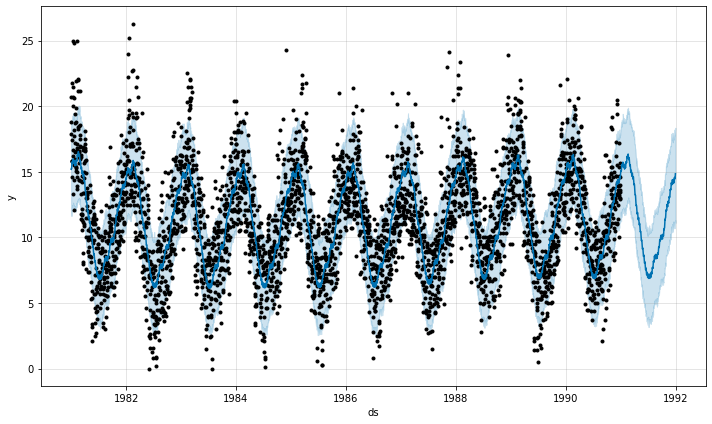

In [17]:
fig1 = m.plot(forecast)

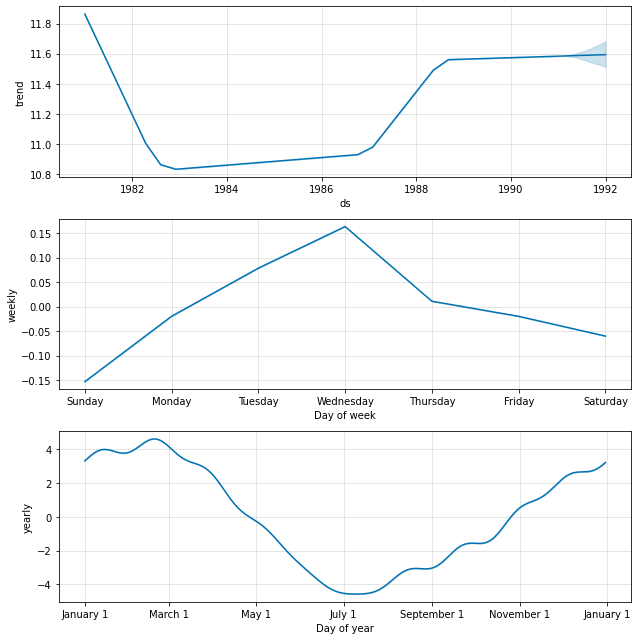

In [18]:
fig2 = m.plot_components(forecast)

## Trend Changepoints

In [19]:
from prophet.plot import add_changepoints_to_plot

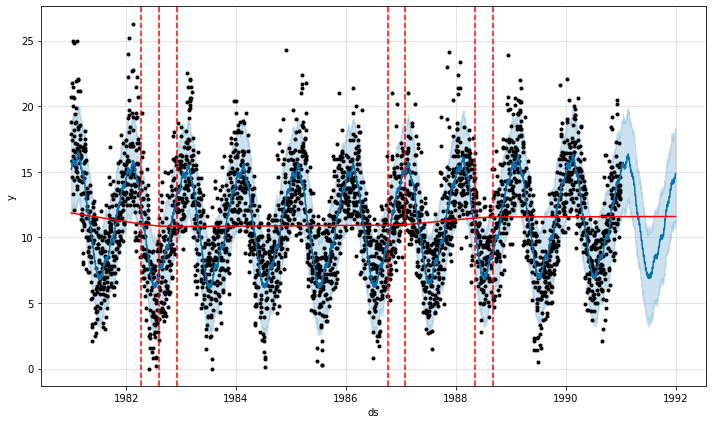

In [20]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Trend Flexibility

In [21]:
m = Prophet(changepoint_prior_scale=0.005)

In [22]:
forecast = m.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/ezc7e68x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/39x770zr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73839', 'data', 'file=/tmp/tmpllved68f/ezc7e68x.json', 'init=/tmp/tmpllved68f/39x770zr.json', 'output', 'file=/tmp/tmplan_qydv/prophet_model-20220818114858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:48:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:48:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


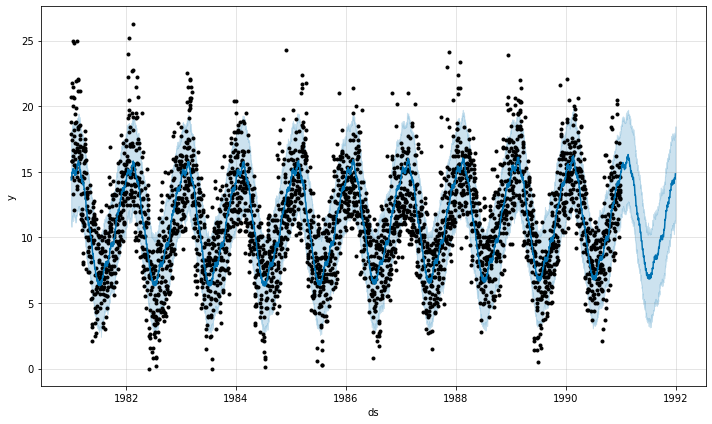

In [23]:
fig = m.plot(forecast)

## Visualize Seasonality

In [24]:
from prophet.plot import plot_yearly

In [25]:
m = Prophet().fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/5c_x9e1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/k09pd8as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32668', 'data', 'file=/tmp/tmpllved68f/5c_x9e1o.json', 'init=/tmp/tmpllved68f/k09pd8as.json', 'output', 'file=/tmp/tmpcw6q1oy5/prophet_model-20220818115156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:51:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:51:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


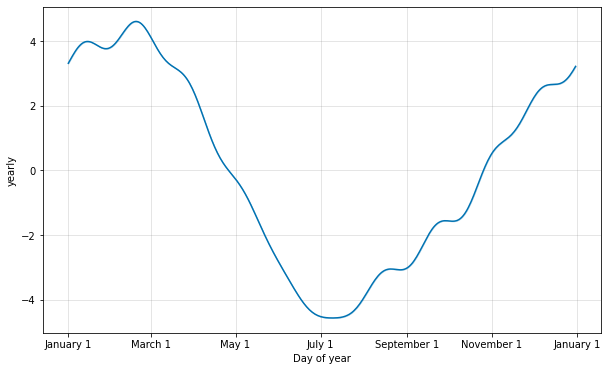

In [26]:
a = plot_yearly(m)

In [27]:
m = Prophet(yearly_seasonality=20).fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/mih0ho5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/q51nq99o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3001', 'data', 'file=/tmp/tmpllved68f/mih0ho5m.json', 'init=/tmp/tmpllved68f/q51nq99o.json', 'output', 'file=/tmp/tmpumuxfolc/prophet_model-20220818115344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:53:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


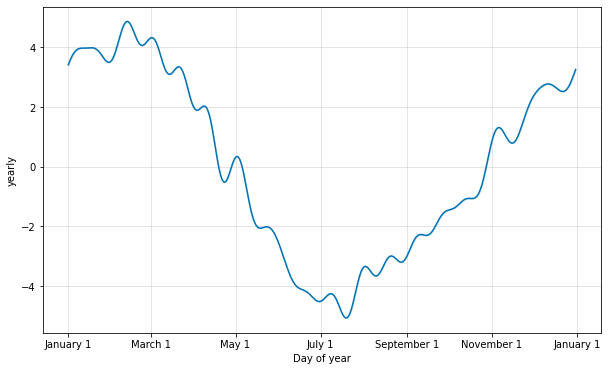

In [28]:
a = plot_yearly(m)

## Uncertainty Intervals

In [29]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/9qug843f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/4h0vfwh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7960', 'data', 'file=/tmp/tmpllved68f/9qug843f.json', 'init=/tmp/tmpllved68f/4h0vfwh3.json', 'output', 'file=/tmp/tmptp6ud1ai/prophet_model-20220818115627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:56:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:56:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


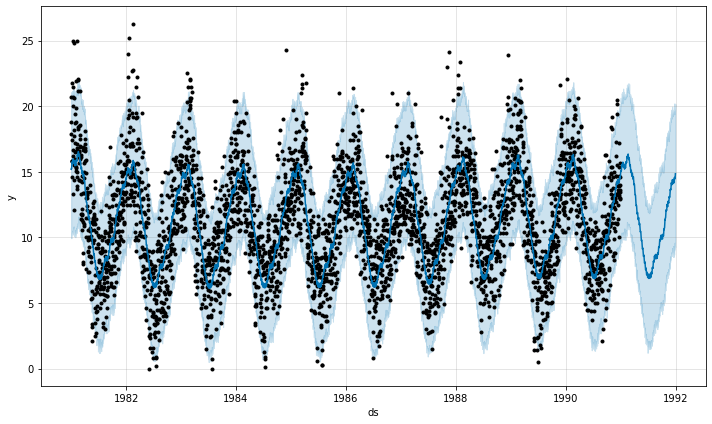

In [30]:
fig = m.plot(forecast)

## Cros-Validation and Performance Metrics

In [31]:
from prophet.diagnostics import cross_validation

In [32]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')

INFO:prophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/f8st6ujt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/hnwi_7bx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60838', 'data', 'file=/tmp/tmpllved68f/f8st6ujt.json', 'init=/tmp/tmpllved68f/hnwi_7bx.json', 'output', 'file=/tmp/tmpaj98y3f1/prophet_model-20220818120137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/mw4virds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/9fc85573.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1983-02-07,16.427850,12.966996,19.650809,20.3,1983-02-06
1,1983-02-08,16.765482,13.472355,19.908531,22.5,1983-02-06
2,1983-02-09,16.956146,13.869902,20.334517,17.2,1983-02-06
3,1983-02-10,16.682363,13.071882,20.012828,15.9,1983-02-06
4,1983-02-11,17.094443,13.449028,20.381721,16.8,1983-02-06


In [34]:
from prophet.diagnostics import performance_metrics

In [35]:
df_perf = performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


In [36]:
df_perf.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,8.164446,2.857350,2.227261,0.167071,0.215010,0.786472
1,38 days,8.043889,2.836175,2.211407,0.165861,0.213240,0.791956
2,39 days,7.836824,2.799433,2.181150,0.159259,0.209601,0.799147
3,40 days,7.772042,2.787838,2.173591,0.159177,0.208576,0.799147
4,41 days,7.829565,2.798136,2.182165,0.159818,0.209444,0.797197


In [37]:
from prophet.plot import plot_cross_validation_metric

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


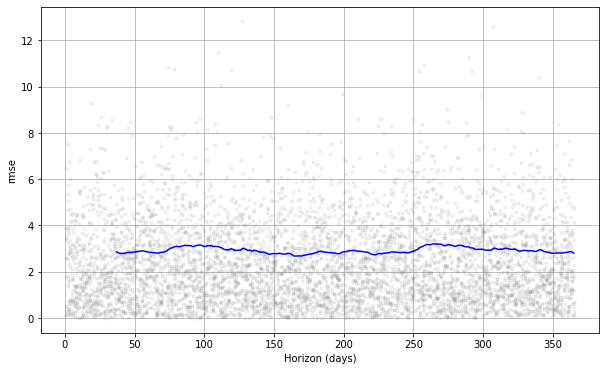

In [38]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## Hyperparameter Tunning

In [39]:
from itertools import product

In [40]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

In [41]:
all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

In [43]:
rmses = []

In [44]:
for params in all_params:
  m = Prophet(**params).fit(df)
  df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
  df_p = performance_metrics(df_cv, rolling_window=1)
  rmses.append(df_p['rmse'].values[0])

tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/_2g7i237.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/exx50pe5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57372', 'data', 'file=/tmp/tmpllved68f/_2g7i237.json', 'init=/tmp/tmpllved68f/exx50pe5.json', 'output', 'file=/tmp/tmpugl2cb1v/prophet_model-20220818121217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/wx0t41a2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/jkvt6tn6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57656', 'data', 'file=/tmp/tmpllved68f/wx0t41a2.json', 'init=/tmp/tmpllved68f/jkvt6tn6.json', 'output', 'file=/tmp/tmpnggc0s9f/prophet_model-20220818121218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:12:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/uud7se7e.json
DEBUG:cmdstanpy:i

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/uj14jfdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/8st_vxs6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35497', 'data', 'file=/tmp/tmpllved68f/uj14jfdy.json', 'init=/tmp/tmpllved68f/8st_vxs6.json', 'output', 'file=/tmp/tmpoc13r78b/prophet_model-20220818121315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:13:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:13:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:13:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/jax360sh.json
DEBUG:cmdstanpy:i

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/lzl13_yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/brkl9qv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41399', 'data', 'file=/tmp/tmpllved68f/lzl13_yk.json', 'init=/tmp/tmpllved68f/brkl9qv_.json', 'output', 'file=/tmp/tmpo_pq5htl/prophet_model-20220818121409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:14:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:14:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:14:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/zxn2jvfc.json
DEBUG:cmdstanpy:i

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/s9_tugxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/_n83mndh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23371', 'data', 'file=/tmp/tmpllved68f/s9_tugxa.json', 'init=/tmp/tmpllved68f/_n83mndh.json', 'output', 'file=/tmp/tmplqjc8fve/prophet_model-20220818121459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:14:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/57t8lber.json
DEBUG:cmdstanpy:i

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/zqkngjaq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/eod_ydzn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98670', 'data', 'file=/tmp/tmpllved68f/zqkngjaq.json', 'init=/tmp/tmpllved68f/eod_ydzn.json', 'output', 'file=/tmp/tmpuxu7_lz3/prophet_model-20220818121546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/uc4uqem3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/n7jgtelh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/dd5m5rvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/6m01rrn8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88092', 'data', 'file=/tmp/tmpllved68f/dd5m5rvo.json', 'init=/tmp/tmpllved68f/6m01rrn8.json', 'output', 'file=/tmp/tmpaatbwcgt/prophet_model-20220818121634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:16:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/3tawz4ex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/n8ilcfjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/574bs46m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/0ux56qh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62283', 'data', 'file=/tmp/tmpllved68f/574bs46m.json', 'init=/tmp/tmpllved68f/0ux56qh5.json', 'output', 'file=/tmp/tmpv2fy6z2h/prophet_model-20220818121720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:17:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/a2c3qb5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/57ka1xbl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/cqvxz0jf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/yuyksdqt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71417', 'data', 'file=/tmp/tmpllved68f/cqvxz0jf.json', 'init=/tmp/tmpllved68f/yuyksdqt.json', 'output', 'file=/tmp/tmpjmm9_uwx/prophet_model-20220818121805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/26uj14hi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/atxgcilt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/3iv8wyt7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/xlgjum3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44249', 'data', 'file=/tmp/tmpllved68f/3iv8wyt7.json', 'init=/tmp/tmpllved68f/xlgjum3j.json', 'output', 'file=/tmp/tmptxk0aa4x/prophet_model-20220818121854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/5rl3mf0u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/xblvi50k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/vibuv4nn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/zvkiw5ng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94913', 'data', 'file=/tmp/tmpllved68f/vibuv4nn.json', 'init=/tmp/tmpllved68f/zvkiw5ng.json', 'output', 'file=/tmp/tmp180l9zjf/prophet_model-20220818121941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:19:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/d_ussc1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/r9nhv7se.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/avpiywap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/0e7g064s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89420', 'data', 'file=/tmp/tmpllved68f/avpiywap.json', 'init=/tmp/tmpllved68f/0e7g064s.json', 'output', 'file=/tmp/tmpikvpur43/prophet_model-20220818122029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:20:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:20:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/aho9kaq7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/ut9gs96h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/9s1w25v7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/xj2f3ifb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20067', 'data', 'file=/tmp/tmpllved68f/9s1w25v7.json', 'init=/tmp/tmpllved68f/xj2f3ifb.json', 'output', 'file=/tmp/tmp5ynohdxl/prophet_model-20220818122118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/ver7xoo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/jzo5lorr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/l38cyy78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/tt_q3ql_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15650', 'data', 'file=/tmp/tmpllved68f/l38cyy78.json', 'init=/tmp/tmpllved68f/tt_q3ql_.json', 'output', 'file=/tmp/tmpyiykturm/prophet_model-20220818122206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:22:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/b7xmtllb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/ljjo2bzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/p66p3c1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/6a63c378.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65982', 'data', 'file=/tmp/tmpllved68f/p66p3c1f.json', 'init=/tmp/tmpllved68f/6a63c378.json', 'output', 'file=/tmp/tmp30q71w9c/prophet_model-20220818122305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/hjwu6_o2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/rd4132qh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/g0pb1v6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/dr_02drq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96018', 'data', 'file=/tmp/tmpllved68f/g0pb1v6j.json', 'init=/tmp/tmpllved68f/dr_02drq.json', 'output', 'file=/tmp/tmp4iqx0l4v/prophet_model-20220818122359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/2z_68pck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/c61m_3o2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/z3_n0r9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/dqy7oit5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53925', 'data', 'file=/tmp/tmpllved68f/z3_n0r9m.json', 'init=/tmp/tmpllved68f/dqy7oit5.json', 'output', 'file=/tmp/tmpmhbnpmai/prophet_model-20220818122454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/s3kp3y0x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpllved68f/s9h83tp1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

In [45]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  2.914993
1                     0.001                     0.10  2.863845
2                     0.001                     1.00  2.877424
3                     0.001                    10.00  2.875017
4                     0.010                     0.01  2.817788
5                     0.010                     0.10  2.829769
6                     0.010                     1.00  2.837160
7                     0.010                    10.00  2.826973
8                     0.100                     0.01  3.515413
9                     0.100                     0.10  2.899291
10                    0.100                     1.00  2.903298
11                    0.100                    10.00  2.903339
12                    0.500                     0.01  6.558529
13                    0.500                     0.10  2.947020
14                    0.500                     1.00  3

In [46]:
best_params = all_params[np.argmin(rmses)]

In [47]:
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}
